## GHCNM with small PKL

pkl generated from create_small_ghcnm_pkl.ipynb

https://www.ncdc.noaa.gov/ghcnm/v3.php<br />
ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/README<br />
For Station ID check https://www.wmo.int/cpdb/volume_a_observing_stations/list_stations

<p>
This notebook is prep work for an ongoing Dash/Plotly interactive project plotting data provided by the following: 
    <ul>
        <li>The Global Historical Climatology Network-Monthly (GHCN-M) temperature dataset</li>
    </ul>
</p>
<p>
    Find the project here: 
</p>

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# unpickle temps created with ghcnm.ipynb
with open('./ghcnm_means.pkl', 'rb') as qca_file:
    qca_temps = pickle.load(qca_file)
    
qca_temps.reset_index(inplace=True)

In [3]:
qca_temps.shape

(22839, 14)

In [4]:
qca_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22839 entries, 0 to 22838
Data columns (total 14 columns):
CountryCode    22839 non-null int64
YEAR           22839 non-null int64
VALUE1         22839 non-null float64
VALUE2         22839 non-null float64
VALUE3         22839 non-null float64
VALUE4         22839 non-null float64
VALUE5         22839 non-null float64
VALUE6         22839 non-null float64
VALUE7         22839 non-null float64
VALUE8         22839 non-null float64
VALUE9         22839 non-null float64
VALUE10        22839 non-null float64
VALUE11        22839 non-null float64
VALUE12        22839 non-null float64
dtypes: float64(12), int64(2)
memory usage: 2.4 MB


In [5]:
# alternative count check
qca_temps.describe().loc[['count']]

,CountryCode,YEAR,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
count,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0,22839.0


In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

cntrycode = 101
# mask2 = qca_temps['Country'].str.strip() == 'ALGERIA'
# Here are the country codes: ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v3/country-codes
df_on_cntrycode = qca_temps[qca_temps['CountryCode'] == cntrycode]

# drop observations without all 12 months; read documentation regarding missing values
df_on_cntrycode.replace(-9999, np.NaN, inplace=True)
df_on_cntrycode.dropna(inplace=True)

print('Min/max year = {}, {} '.format(df_on_cntrycode['YEAR'].min(), df_on_cntrycode['YEAR'].max()))
print()

# show array of years
sorted_years = df_on_cntrycode.sort_values("YEAR", ascending = True)
# print(sorted_years.YEAR.unique())

# years to compare
loYear = df_on_cntrycode['YEAR'] == 1856
hiYear = df_on_cntrycode['YEAR'] == 2016
temps_min = df_on_cntrycode[loYear]
temps_max = df_on_cntrycode[hiYear]

Min/max year = 1853, 2016 



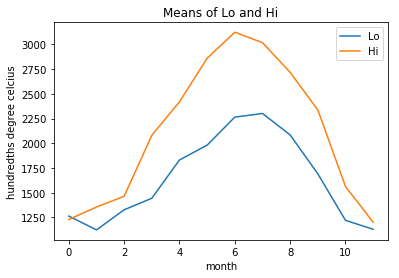

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'

cntrycode = 101
df_means_by_cntrycode = qca_temps[qca_temps['CountryCode'] == cntrycode]
    
# years to compare
loYear = df_on_cntrycode['YEAR'] == 1856
hiYear = df_on_cntrycode['YEAR'] == 2016
temps_min = df_on_cntrycode[loYear]
temps_max = df_on_cntrycode[hiYear]

x = np.arange(0, 12, 1)
    
plt.title('Means of Lo and Hi')
plt.xlabel('month')
plt.ylabel('hundredths degree celcius')
plt.plot(x, temps_min.iloc[:,2:14].values.flatten(), label='Lo')
plt.plot(x, temps_max.iloc[:,2:14].values.flatten(), label='Hi')
plt.legend()
plt.show()